# CompositeBloq Graph Drawing

`qualtran.drawing` includes classes for drawing a [`CompositeBloq`](/reference/qualtran/CompositeBloq.md) as a directed acyclic graph. This uses the popular package `graphviz` to render the drawings. The simplest way to get started is by calling `show_bloq`.

## Basic Usage

In [1]:
from qualtran.drawing import show_bloq

# Use some test bloqs to show drawing features
from qualtran.drawing.graphviz_test import Atom, TestParallelBloq

Each constituent bloq is a table whose header contains the bloq name. Each row is a register. Edges represent connections between soquets. Each edge is labeled with the bitsize of the connected registers. Dangling soquets (corresponding to the enclosing bloq's registers) are drawn as plain text.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


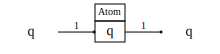

In [2]:
show_bloq(Atom())

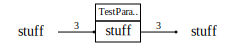

In [3]:
show_bloq(TestParallelBloq())

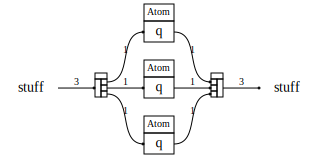

In [4]:
cbloq = TestParallelBloq().decompose_bloq()
show_bloq(cbloq)

## Advanced Usage

### `PrettyGraphDrawer` and `GraphDrawer`

These classes contain the complete functionality for translating a composite bloq into a graphviz-compatible graph.

By default, we use `PrettyGraphDrawer` which abbreviates names, hides some details of reshaping bloqs, and chooses drawing parameters to give a compact visualization of the bloq. For debugging purposes or to serve as a base class for modifying drawing parameters to your liking, consider `GraphDrawer` which relies solely on graphviz defaults.

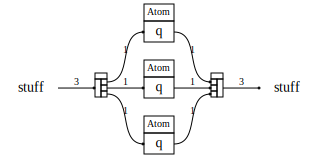

In [5]:
from qualtran.drawing import PrettyGraphDrawer

PrettyGraphDrawer(cbloq).get_svg()

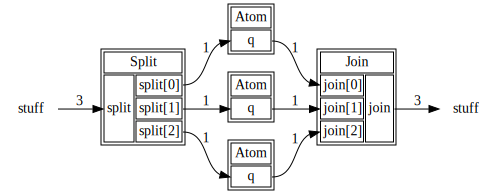

In [6]:
from qualtran.drawing import GraphDrawer

GraphDrawer(cbloq).get_svg()

### `ClassicalSimGraphDrawer`

This simple extension of `GraphDrawer` annotates each edge according to classical data that flows through bloqs supporting the classical simulation protocol.

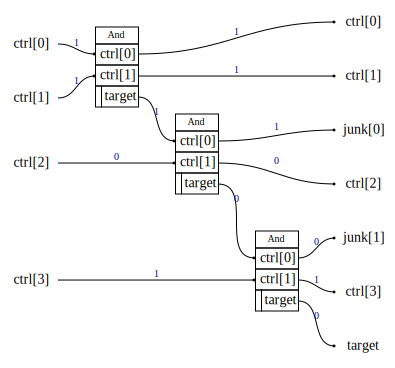

In [7]:
from qualtran.drawing import ClassicalSimGraphDrawer
from qualtran.bloqs.and_bloq import MultiAnd

ClassicalSimGraphDrawer(
    bloq=MultiAnd((1,1,1,1)).decompose_bloq(), 
    vals=dict(ctrl=[1,1,0,1])
).get_svg()

### Graphviz and `pydot`

We use `pydot` to manupulate graphviz graphs. You can get that graph directly:

In [8]:
graph = GraphDrawer(cbloq).get_graph()
print(graph.to_string())

digraph my_graph {
rankdir=LR;
subgraph  {
rank=same;
stuff_G15 [label=stuff, shape=plaintext];
}

Atom [label=<<TABLE >
  <TR><TD colspan="2">Atom</TD></TR>
  <TR><TD colspan="2" port="q_G4">q</TD></TR>
</TABLE>>, shape=plain];
Join [label=<<TABLE >
  <TR><TD colspan="2">Join</TD></TR>
  <TR><TD  port="join_G9">join[0]</TD><TD rowspan="3" port="join_G13">join</TD></TR>
  <TR><TD  port="join_G8">join[1]</TD></TR>
  <TR><TD  port="join_G14">join[2]</TD></TR>
</TABLE>>, shape=plain];
Split [label=<<TABLE >
  <TR><TD colspan="2">Split</TD></TR>
  <TR><TD rowspan="3" port="split_G7">split</TD><TD  port="split_G6">split[0]</TD></TR>
  <TR><TD  port="split_G5">split[1]</TD></TR>
  <TR><TD  port="split_G10">split[2]</TD></TR>
</TABLE>>, shape=plain];
Atom_G0 [label=<<TABLE >
  <TR><TD colspan="2">Atom</TD></TR>
  <TR><TD colspan="2" port="q_G11">q</TD></TR>
</TABLE>>, shape=plain];
Atom_G2 [label=<<TABLE >
  <TR><TD colspan="2">Atom</TD></TR>
  <TR><TD colspan="2" port="q_G12">q</TD></TR>
</T

### Register Groups

We group left and right registers with shared names. This section shows some usual and unusual register specifications to test the graphviz logic for making the table rows match up.

In [9]:
from qualtran import Bloq, Register, Signature, Side

class SignatureBloq(Bloq):
    """Placeholder bloq that lets you specify its signature."""
    def __init__(self, signature: Signature):
        self._signature = signature
        
    @property
    def signature(self) -> Signature:
        return self._signature
        
    def short_name(self):
        return 'Bloq'

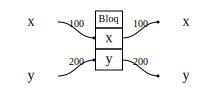

In [10]:
bloq = SignatureBloq(Signature([
    Register('x', 100),
    Register('y', 200),
]))
show_bloq(bloq)

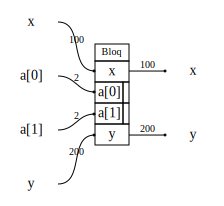

In [11]:
bloq = SignatureBloq(Signature([
    Register('x', 100),
    Register('a', 2, shape=(2,), side=Side.LEFT),
    Register('y', 200),
]))
show_bloq(bloq)

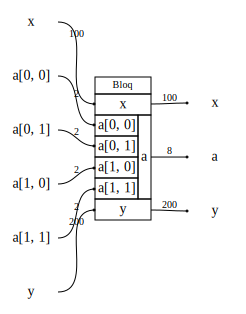

In [12]:
bloq = SignatureBloq(Signature([
    Register('x', 100),
    Register('a', 2, shape=(2,2), side=Side.LEFT),
    Register('a', 8,  side=Side.RIGHT),
    Register('y', 200),
]))
show_bloq(bloq)

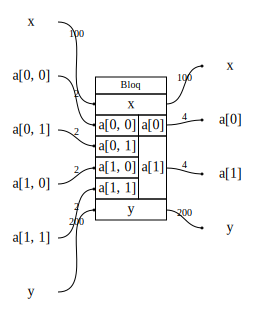

In [13]:
bloq = SignatureBloq(Signature([
    Register('x', 100),
    Register('a', 2, shape=(2,2), side=Side.LEFT),
    Register('a', 4, shape=(2,), side=Side.RIGHT),
    Register('y', 200),
]))
show_bloq(bloq)